# Question 1: Frequency Distribution

In [71]:
#Loading the dataset
import pandas as pd

df= pd.read_csv(r'C:\Users\USER\AppData\Local\Programs\Python\Python37\Scripts\nike_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()
#df.to_csv('nike_data.csv')

,user,hashtags,status_text,clean_data
0,TheFashionLaw,[],"4 lawsuits, corporate “bullying,” and an alleg...",lawsuit corporate bullying allege pattern ramp...
1,JohnSquadVanDam,[],Yooo so Nike made Air forces for the Air Force...,yoo nike make air force air force standard dep...
2,SneakerDropCo,[],ad: Close to 20% off the Nike Air VaporMax 202...,ad close nike air vapormax flyknit iron grey f...
3,hillhouse1w,[],@Pocahhhhh The itty witty Nike track suit. 🥺,itty witty nike track suit
4,Tomilayo_o,[],@Nike__Naya Rice for breakfast by God’s grace,rice breakfast god grace


In [72]:
#remove stop words, stopword example: “the”, “a”, “an”, “in”
from nltk.corpus import stopwords
stop = stopwords.words('english')


df['clean_data'] = df['clean_data'].apply(lambda x:' '.join([word for word in str(x).split() if word not in (stop)]))
print(df['clean_data'])
#nike_data.to_csv('nike_data.csv')

0       lawsuit corporate bullying allege pattern ramp...
1       yoo nike make air force air force standard dep...
2       ad close nike air vapormax flyknit iron grey f...
3                              itty witty nike track suit
4                                rice breakfast god grace
                              ...                        
6995                                     forget cope nike
6996                       time bless nike beta sole come
6997                  merry christmas happy birthday nike
6998                                       want cook nike
6999    nike blazer mid white black premium quality si...
Name: clean_data, Length: 7000, dtype: object


In [73]:
#define the function for extract the hashtags in attribute hashtags 
import re 
def hashtagscleaning(hashtags):
    hashtags = str(hashtags)
    result = re.findall(r"text': \'?([ \w.]+)", hashtags, re.IGNORECASE | re.MULTILINE)
    result = ", ".join(result)
    return result

In [74]:
# Apply the function
df['hashtags'] = df['hashtags'].apply(hashtagscleaning)
print(df.head())

              user hashtags  \
0    TheFashionLaw            
1  JohnSquadVanDam            
2    SneakerDropCo            
3      hillhouse1w            
4       Tomilayo_o            

                                         status_text  \
0  4 lawsuits, corporate “bullying,” and an alleg...   
1  Yooo so Nike made Air forces for the Air Force...   
2  ad: Close to 20% off the Nike Air VaporMax 202...   
3       @Pocahhhhh The itty witty Nike track suit. 🥺   
4      @Nike__Naya Rice for breakfast by God’s grace   

                                          clean_data  
0  lawsuit corporate bullying allege pattern ramp...  
1  yoo nike make air force air force standard dep...  
2  ad close nike air vapormax flyknit iron grey f...  
3                         itty witty nike track suit  
4                           rice breakfast god grace  


In [75]:
#collect the hashtags to form a list 
taglist = df['hashtags'].str.lower()
taglist = taglist.str.replace(',', '')
taglist= taglist.tolist()
taglist = ' '.join(taglist).split()

In [76]:
#show the first 10 items in taglist
print(taglist[:10])

['abuja', 'lagos', 'plugcounty', 'unilag', 'bowen', 'abuad', 'smartnews', 'shopmycloset', 'ダンススタジオ', 'ダンスレッスン']


## Frequency Distribution

In [6]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [78]:
from collections import Counter
from prettytable import PrettyTable

words = [ w
        for t in df['clean_data']
             for w in t.split() ]

for label, data in (('Word',  words),
                    ('Screen Name', df['user']),
                    ('Hashtag', taglist)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label],  pt.align['Count']=  'l','r' # Set column alignment
    pt._max_width = {label : 100, "Count" : 10 }
    print(pt)

+-------+-------+
| Word  | Count |
+-------+-------+
| nike  |  5784 |
| air   |   892 |
| get   |   653 |
| new   |   639 |
| buy   |   436 |
| via   |   428 |
| like  |   428 |
| max   |   411 |
| check |   411 |
| shoe  |   410 |
+-------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| artbysheriff    |   119 |
| snkr_twitr      |    76 |
| TheSneakerFirm1 |    52 |
| solefed         |    51 |
| SneakerScouts   |    44 |
| SOLELINKS       |    38 |
| NikeService     |    36 |
| sneakersteal    |    32 |
| Nike_Check_Mj   |    31 |
| StargazerGoods  |    30 |
+-----------------+-------+
+---------------+-------+
| Hashtag       | Count |
+---------------+-------+
| nike          |   449 |
| shopmycloset  |   305 |
| fashion       |   155 |
| style         |   149 |
| ad            |   147 |
| poshmark      |   138 |
| sneakers      |    83 |
| sneakerscouts |    44 |
| exclusive     |    27 |
| airforce1     |    26 |
+---------------+-

## Word Cloud

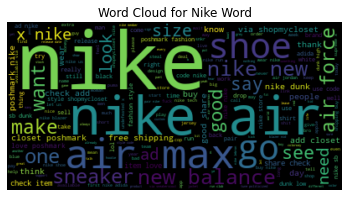

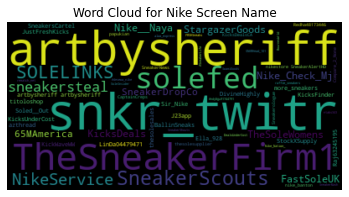

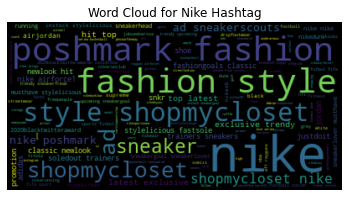

In [48]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

for label, data in (('Word', words),
                    ('Screen Name', df['user']),
                    ('Hashtag', taglist)):
    
    nike_wordcloud = WordCloud().generate(' '.join(data))
    plt.imshow(nike_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Nike ' +label)
    plt.show() 

## Lexical Diversity

In [17]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens)

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return total_words/len(statuses)


In [33]:
print('The lexical diversity of word =% 5f ' %(lexical_diversity(words)))
print('The lexical diversity of username =% 5f' %(lexical_diversity(df['user'])))
print('The lexical diversity of hashtag =% 5f' %(lexical_diversity(df['hashtags'])))
print('The average number of words per tweets =% 5f' %(average_words(df['clean_data'])))

The lexical diversity of word = 0.138773 
The lexical diversity of username = 0.706000
The lexical diversity of hashtag = 0.105286
The average number of words per tweets = 9.698286


## Histogram

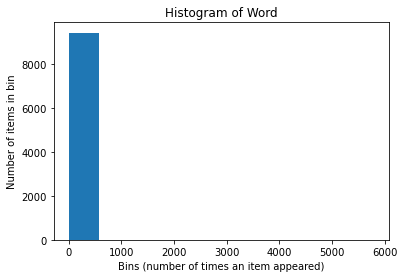

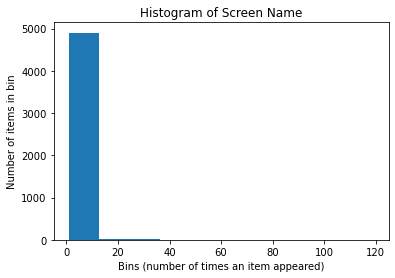

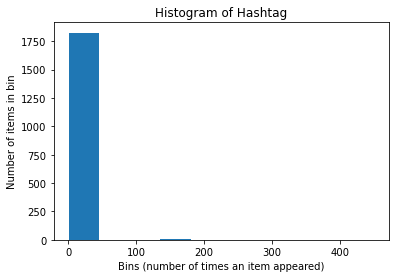

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


for label, data in (('Word', words),
                    ('Screen Name', df['user']),
                    ('Hashtag', taglist)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title( 'Histogram of ' + label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    #figure(num=None, figsize=(16, 12), dpi=160, facecolor='w', edgecolor='k')
    plt.figure()
